In [7]:
import numpy as np
from sage.combinat.cartesian_product import CartesianProduct_iters, CartesianProduct
import matplotlib.pyplot as plt


In [28]:
colors = [ '#4cb963','#57c4e5', '#783f8e', '#ff5964','#BB9F06','#FFB8D1','#A26769','#084B83','#485665','#D972FF','#DEFFFC','#89023E','#F1ECCE','#474B24','#5FBB97','#B2ABBF','#FCF0CC']

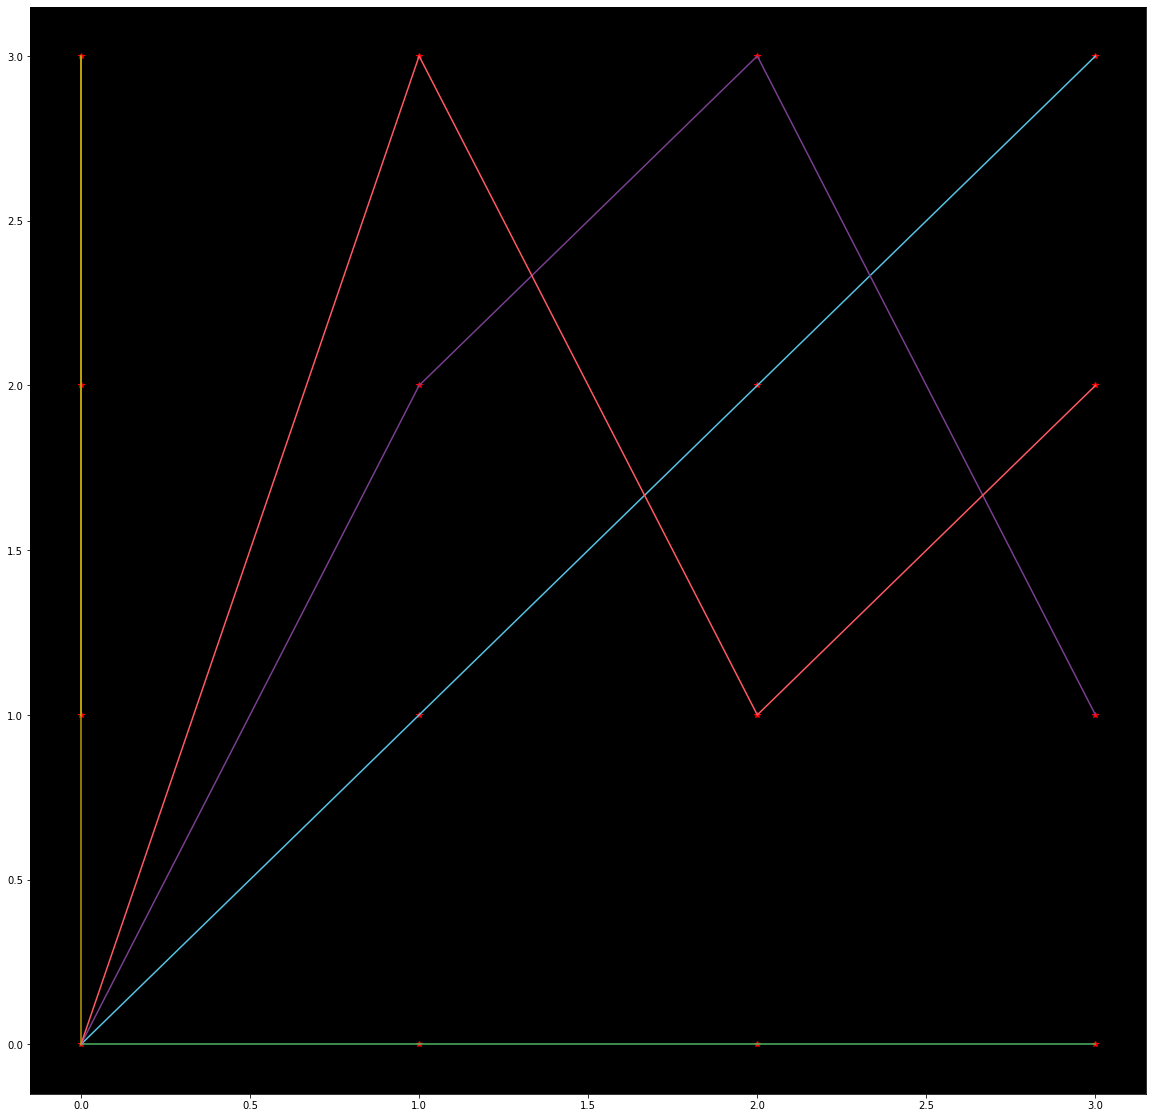

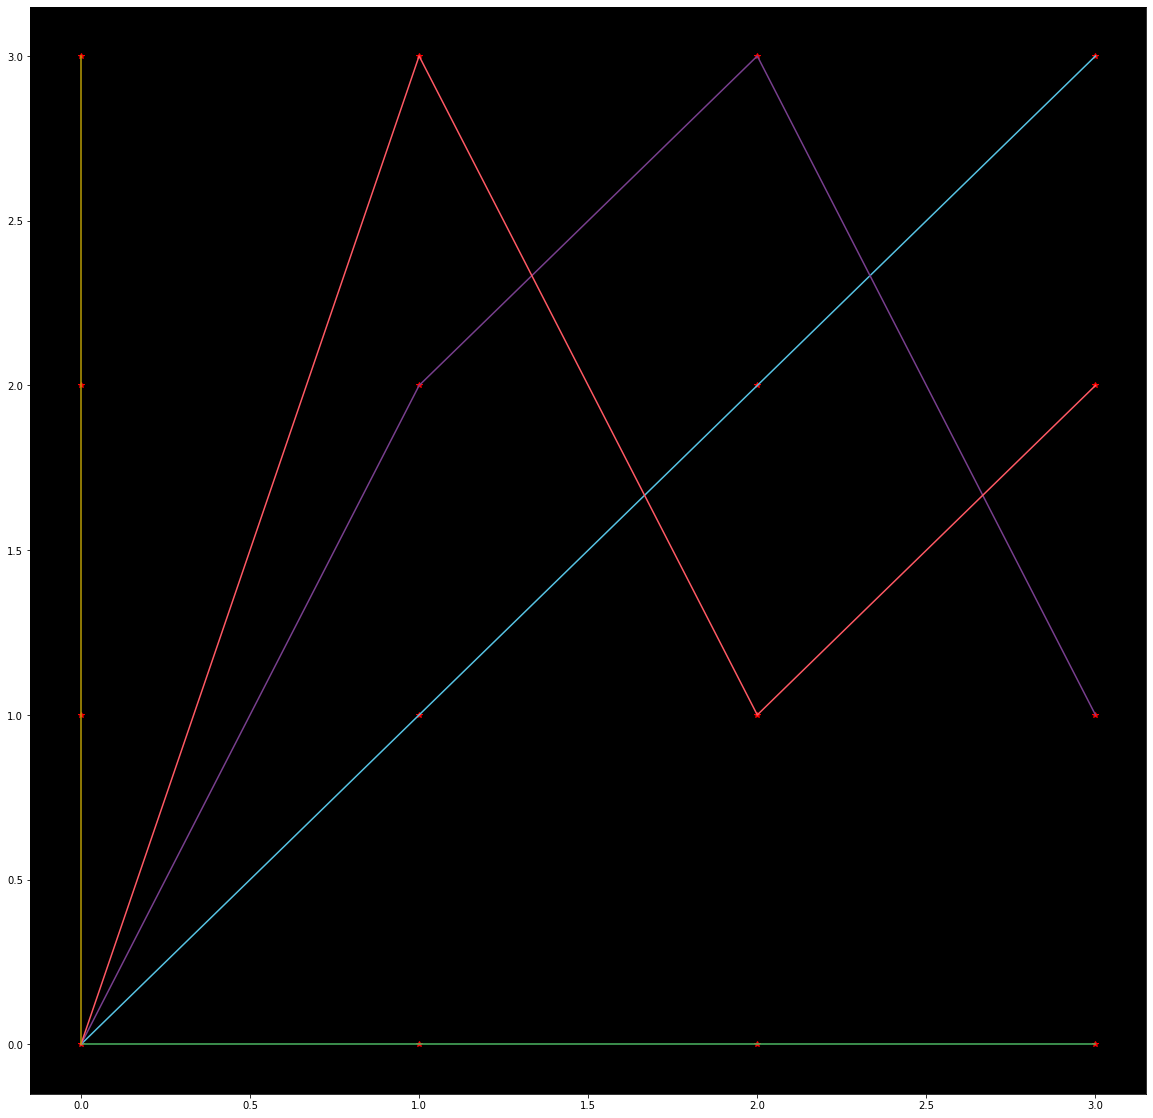

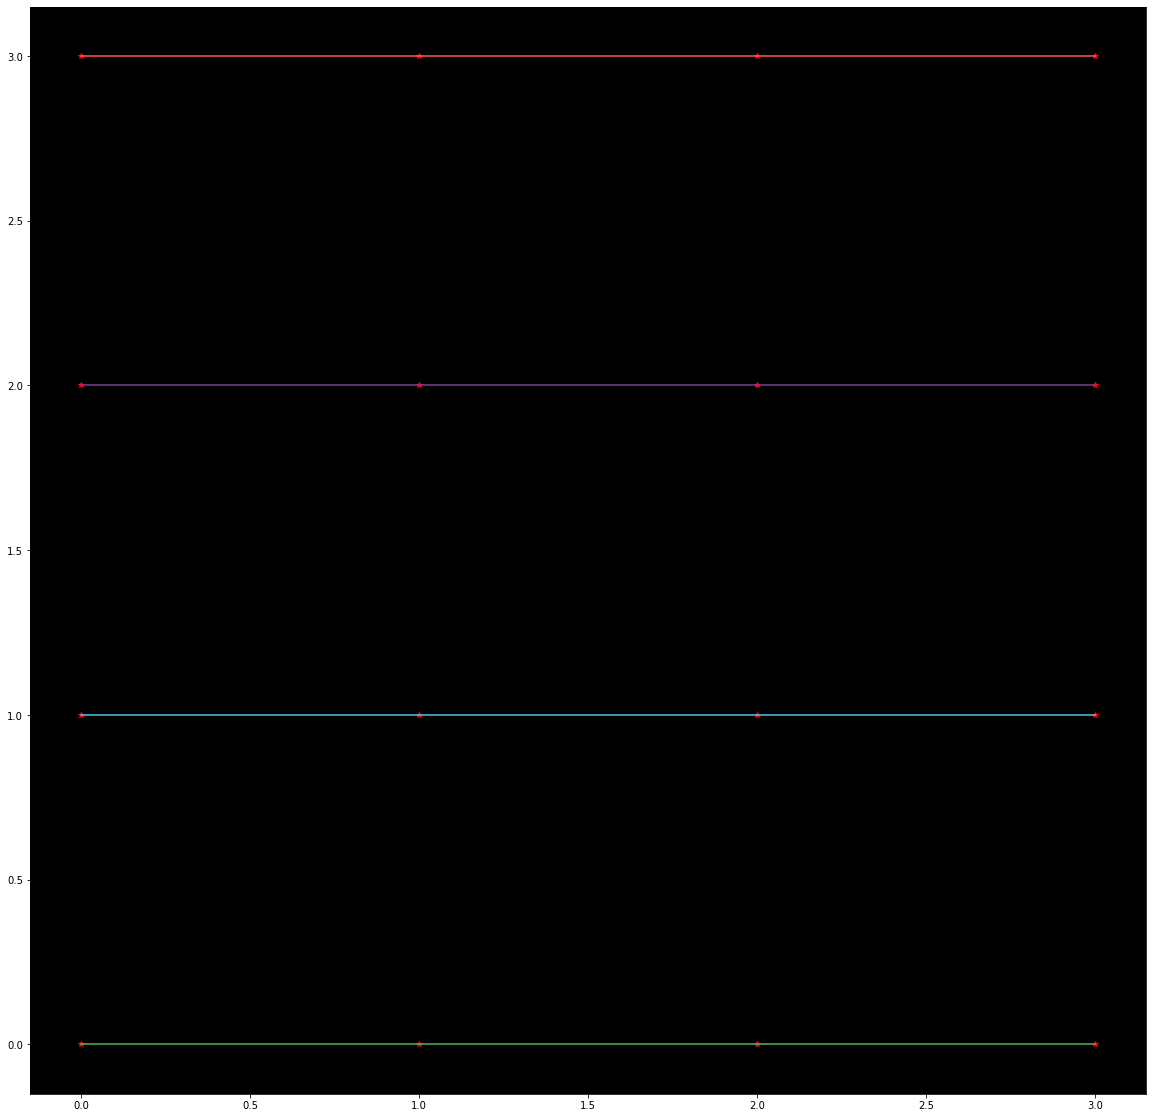

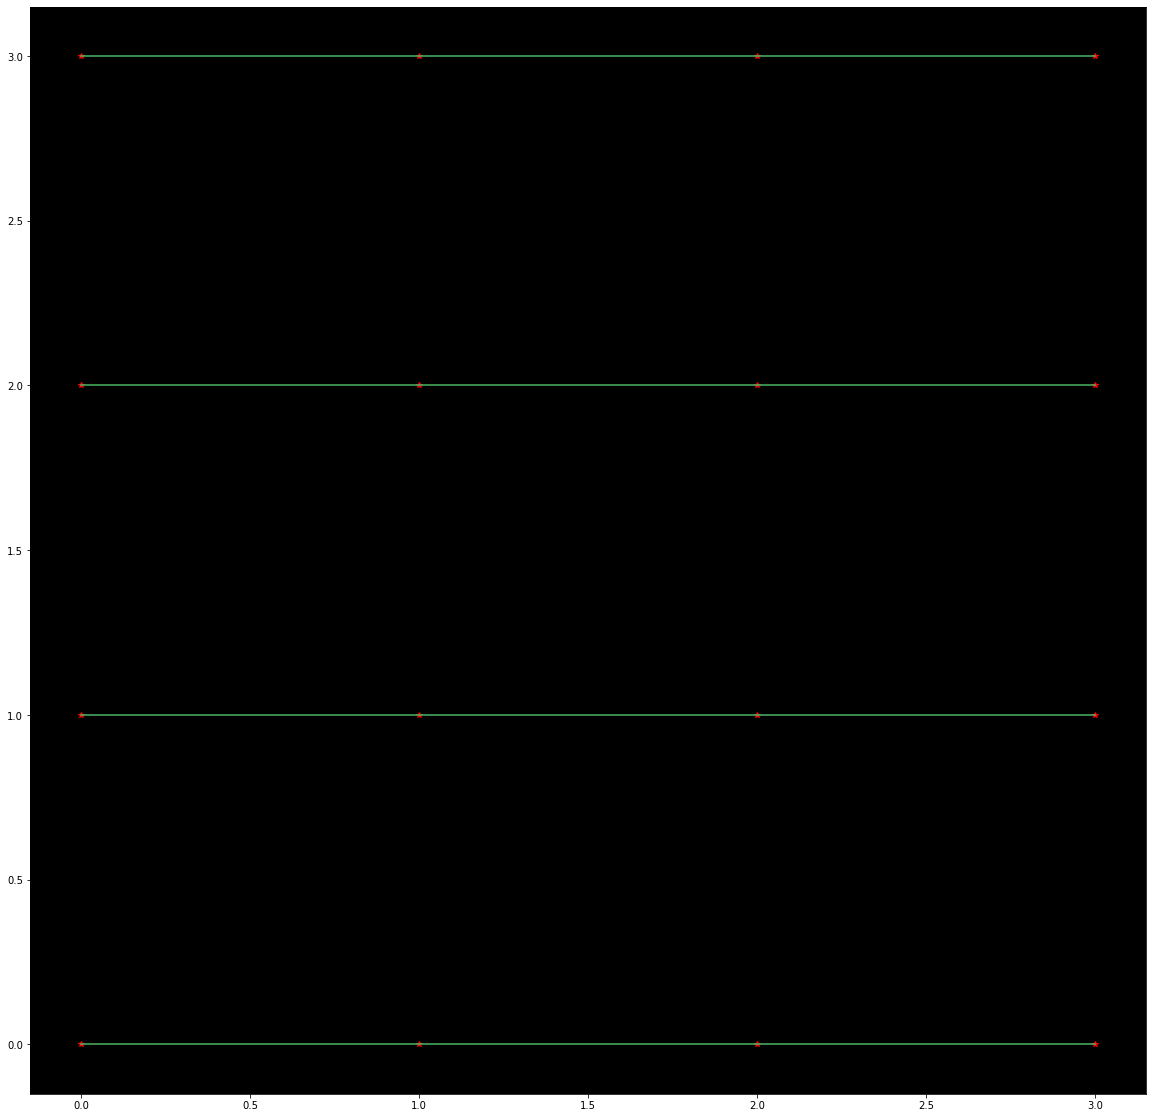

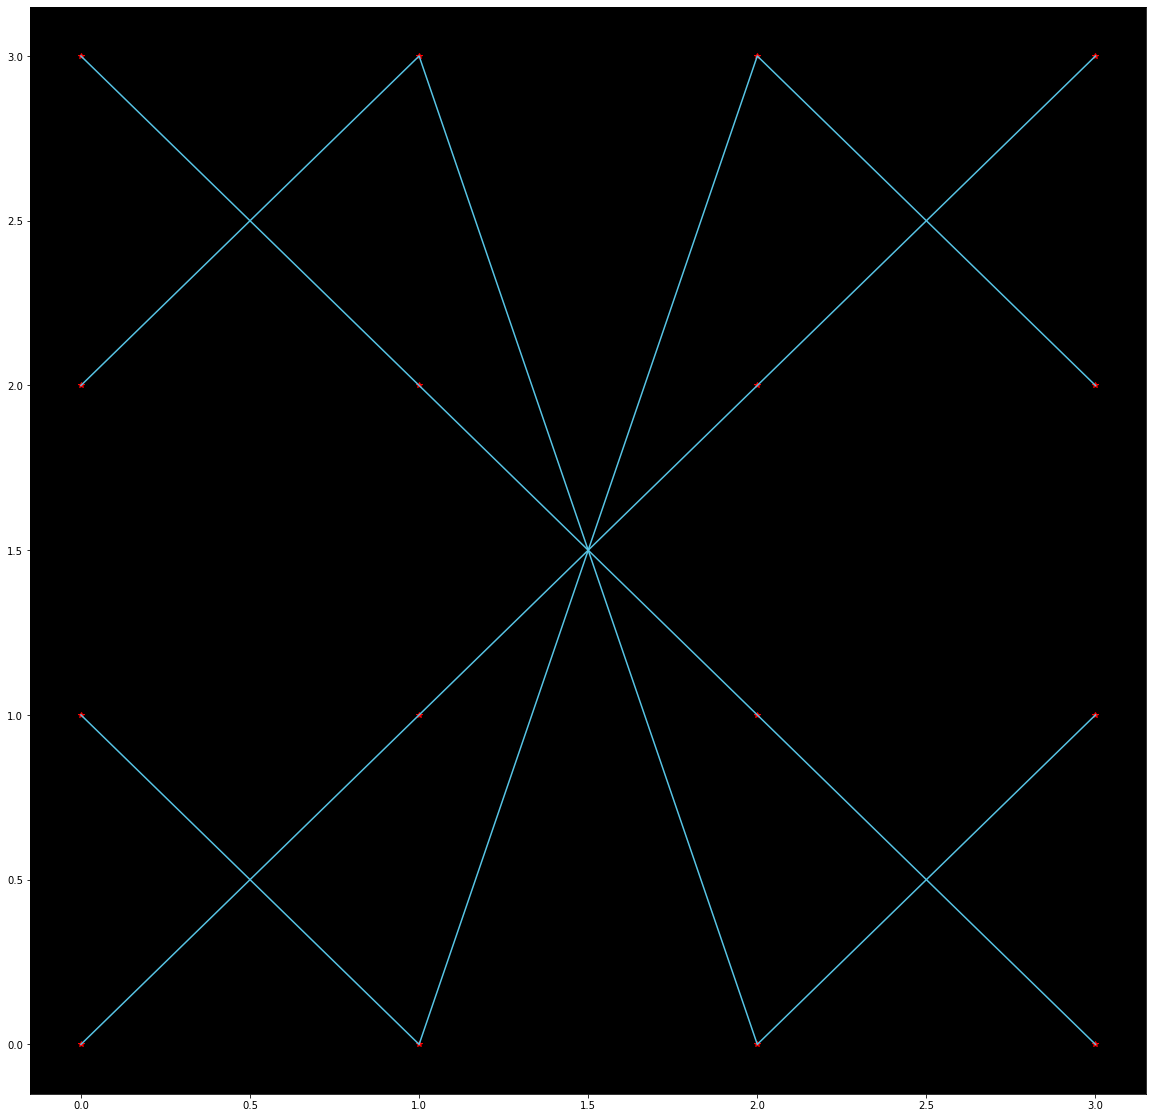

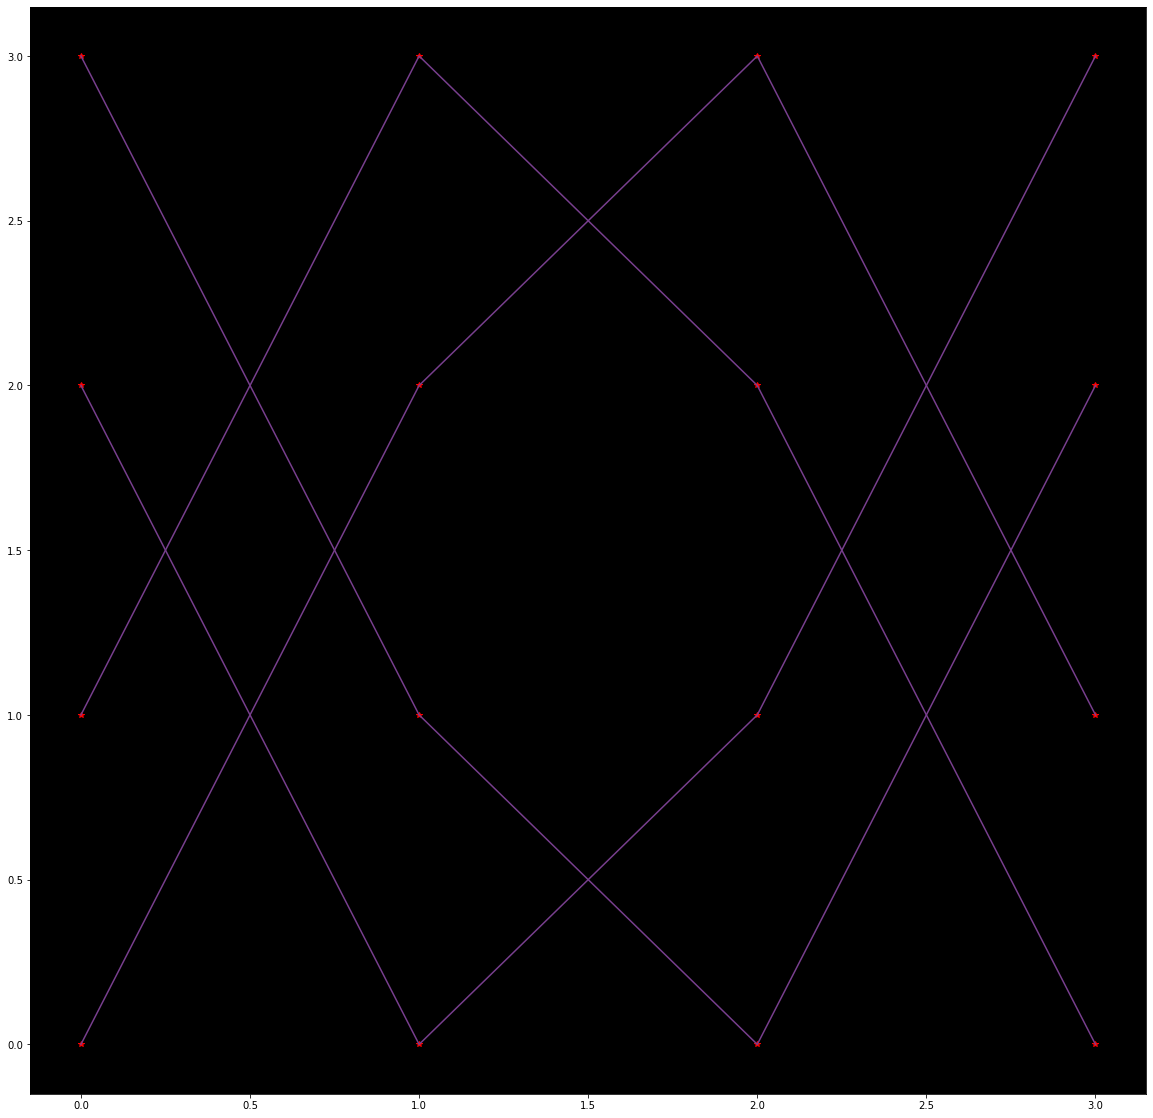

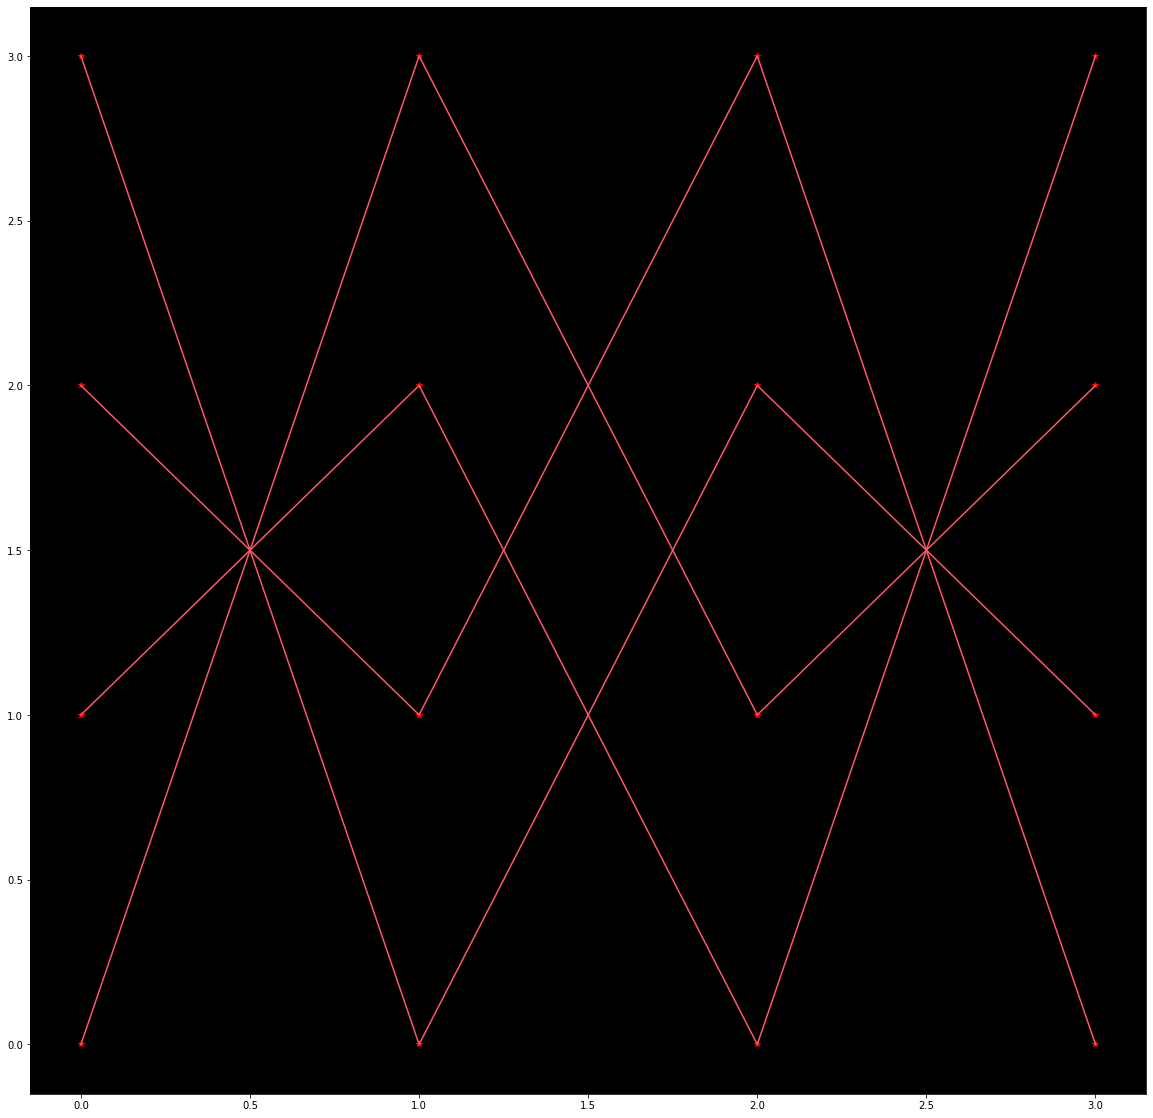

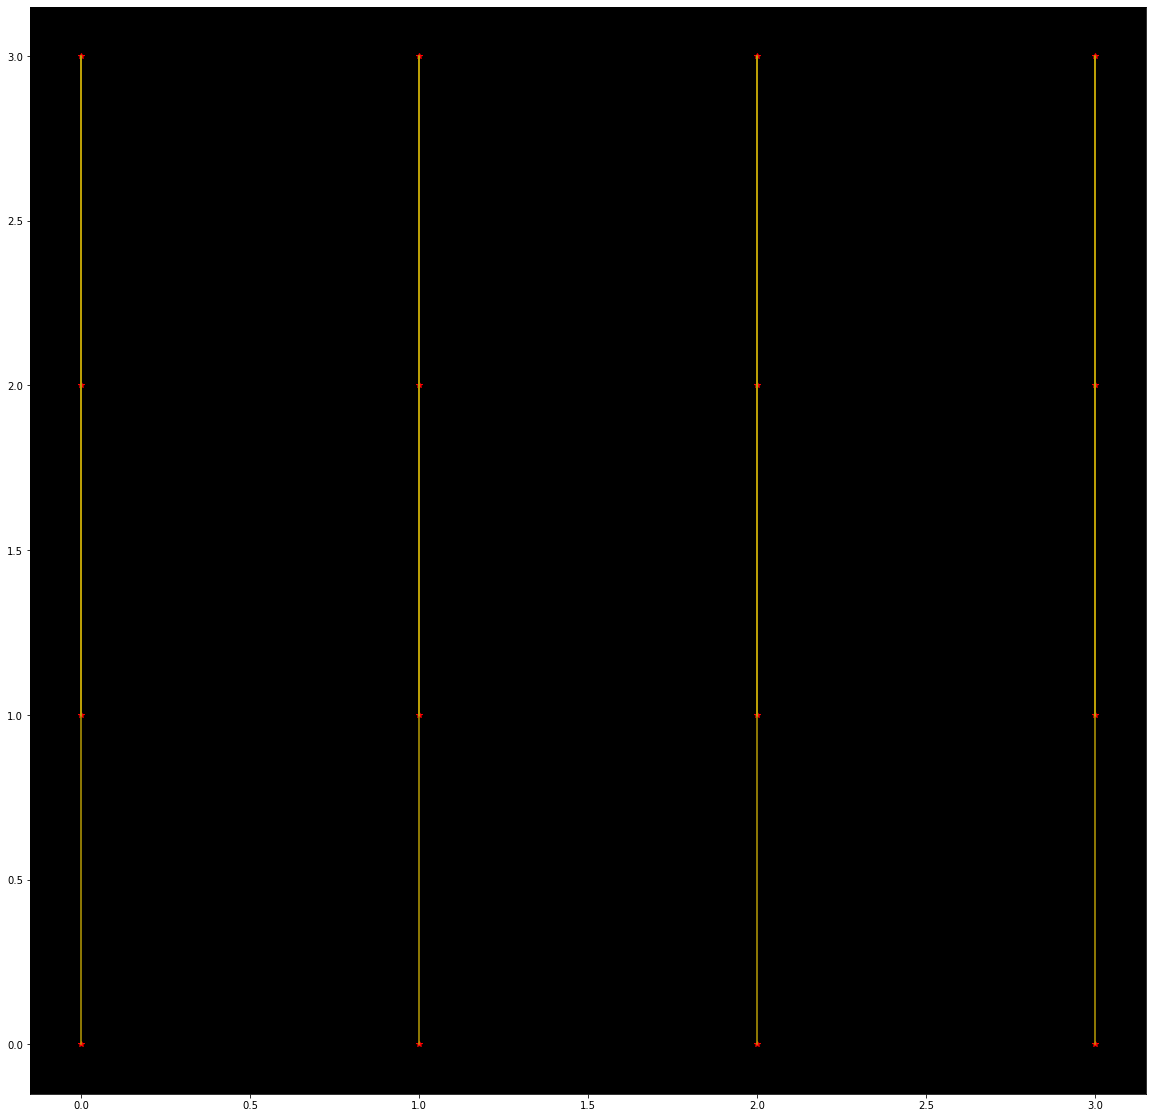

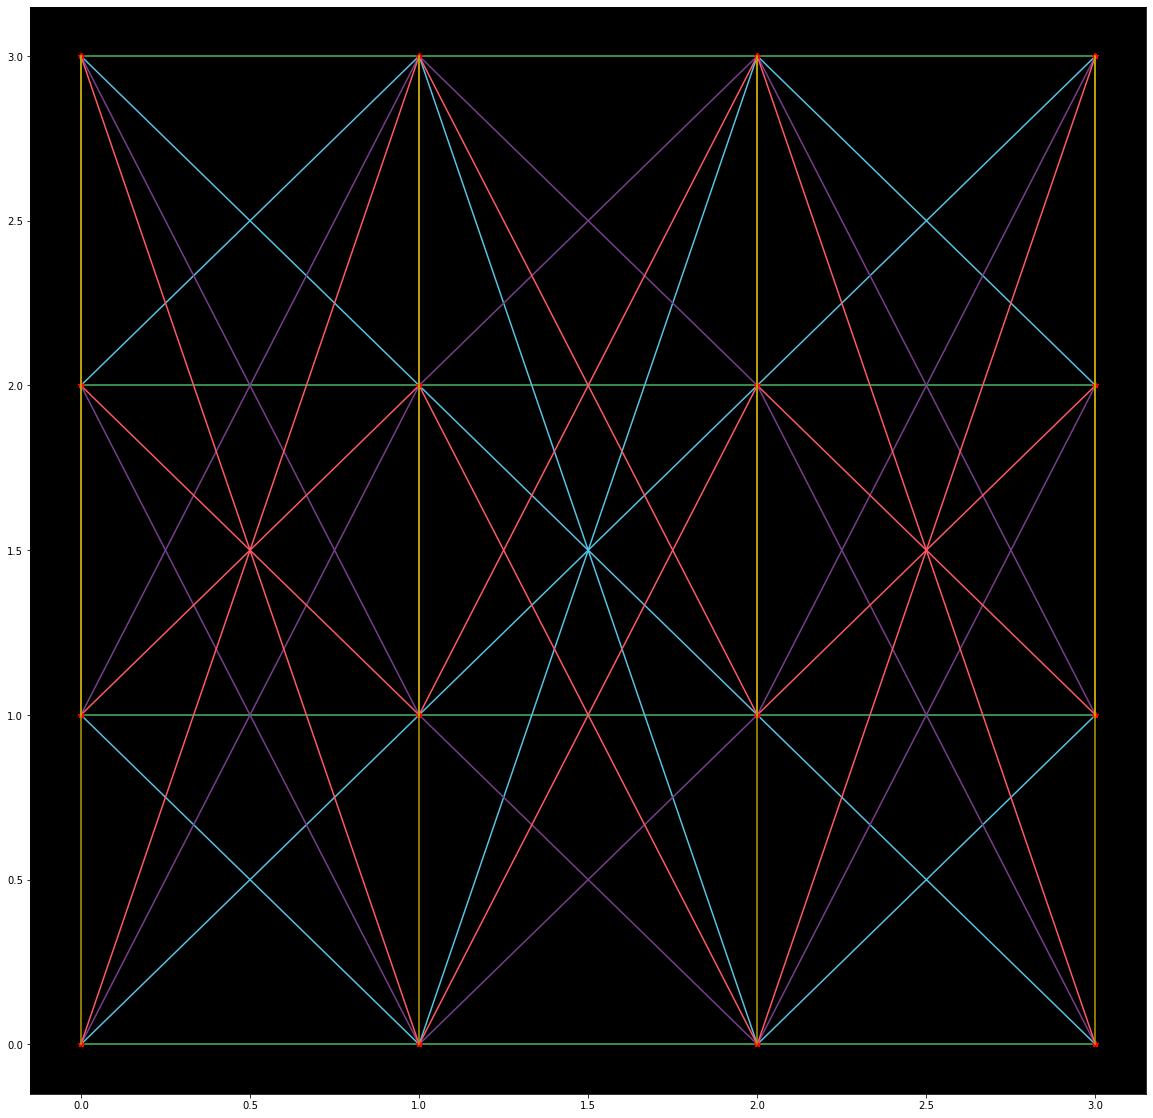

In [29]:
order = 4

G = GF(order)
K = list(G)



K2 = CartesianProduct_iters(K,K)


aK = merge_sort(np.array(K))
aKp = (np.array(K))


aK2 = np.array(K2.list())

mK2 = np.reshape(aK2, [order,order,2])


mainLinesF = generateOrderMainLines(mK2, aK,product_Zmod3)
mainLinesFp = generateOrderMainLines(mK2, aKp,product_Zmod3)

newAlines = generateNewLines(mainLinesF, aK, dilatation)


CartesianMainLinesF = vgetPointsRaros(mainLinesF, aK)
CartesianMainLinesFp = vgetPointsRaros(mainLinesF, aKp)

CartesianLinesF4 = vgetPointsRaros(newAlines, aK)

plot_lines_set(CartesianMainLinesF, order, colors, 'P81/', False)
plot_lines_set(CartesianMainLinesFp, order, colors, '', True)

plot_lines_set(CartesianLinesF4[0], order, colors, '', False)



plot_plano(CartesianLinesF4,'P81/')


In [15]:
def merge_sort(array):
    # If the input array contains fewer than two elements,
    # then return it as the result of the function
    if len(array) < 2:
        return array
    

    midpoint = len(array) // 2

    # Sort the array by recursively splitting the input
    # into two equal halves, sorting each half and merging them
    # together into the final result
    return merge(
        left=merge_sort(array[:midpoint]),
        right=merge_sort(array[midpoint:]))


def merge(left, right):
    # If the first array is empty, then nothing needs
    # to be merged, and you can return the second array as the result
    #print('l',left,'r', right)
    if len(left) == 0:
        return right

    # If the second array is empty, then nothing needs
    # to be merged, and you can return the first array as the result
    if len(right) == 0:
        return left

    result = []
    index_left = index_right = 0
    

    # Now go through both arrays until all the elements
    # make it into the resultant array
    while len(result) < len(left) + len(right):
        # The elements need to be sorted to add them to the
        # resultant array, so you need to decide whether to get
        # the next element from the first or the second array
        try:
            condition = left[index_left][0] <= right[index_right][0]
        except:
            condition = left[index_left] <= right[index_right]

        if condition:
            result.append(left[index_left])
            index_left += 1
        else:
            result.append(right[index_right])
            index_right += 1

        # If you reach the end of either array, then you can
        # add the remaining elements from the other array to
        # the result and break the loop
        if index_right == len(right):
            #print(result,left,right)
            for i in left[index_left:]:
                result.append(i)
            break

        if index_left == len(left):
            #print(result,left,right)
            for i in right[index_right:]:
                result.append(i)
            break
            
    #print(result)

    return result

In [9]:
def generateOrderMainLines(mK2,K, product): #Recibe como parametros dos numpy array uno es el grupo G y el otro es GXG
    
    mainLines = []
    for point in mK2[1,:]:        
        mainLines.append(merge_sort(product(np.repeat([point],len(K), axis=0), np.transpose(np.array([K,K])))))
    
    mainLines.append(merge_sort(product(np.repeat([mK2[0,:][1]],len(K), axis=0), np.transpose(np.array([K,K])))))
    return np.array(mainLines)

In [11]:
def product_Zmod3(a,b):
    ab = a*b
        
    return ab    

In [17]:
def generateNewLines(mainLines2,group,fdilatation):
    alldirlines  = []
    for l in range(len(mainLines2)): #calcula las demas lineas a partir de la dilatacion
        lines = []

        for i in group:
            
            if mainLines2[l][1][0] == 0: 
                #print(fdilatation(mainLines2[l],i,0,1))
                lines.append(merge_sort(fdilatation(mainLines2[l],i,0,1)))
            elif mainLines2[l][1][1] == 0:
                #print(fdilatation(mainLines2[l],0,i,1))
                lines.append(merge_sort(fdilatation(mainLines2[l],0,i,1)))
            else:
                lines.append(merge_sort(fdilatation(mainLines2[l],i,0,1)))
                #print(fdilatation(mainLines2[l],i,0,1))
                
        alines = np.array(lines)
        alldirlines.append(alines)

    aalldirlines = np.array(alldirlines)
    return aalldirlines


In [19]:
def dilatation(l,a,b,y): #define una dilatacion como se especifica arriba
    return y*l+ np.array([a,b])

In [22]:
def getPointsRaros(a, G):
    valor = 0
    for i in range(len(G)):
        if(a == G[i]):
            valor = i
    return valor


vgetPointsRaros = np.vectorize(getPointsRaros,  excluded=['G'])

vgetPointsRaros.excluded.add(1)

In [24]:
def plot_lines_set(lines, ngrid, colors, folder, sort):
    npoints = ngrid
    xpoint = np.matrix(np.arange(npoints))
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_facecolor("black")
    for i in range(npoints):
        ax.plot(xpoint, np.ones(len(xpoint))*i, '*',color = 'r')
                        
    for i in range(len(lines)):
        if sort:
            line = np.array(merge_sort(lines[i]))
        else:
            line = np.array((lines[i]))
        ax.plot(line[:,0],line[:,1], color = colors[i])
    
    fig.savefig(f'{folder}linasPrincipalesCadaDireccion{npoints}.png')
    fig.savefig(f'{folder}linasPrincipalesCadaDireccion{npoints}.svg')


In [26]:
def plot_plano(alines, folder):
    npoints = alines.shape[1]
    xpoint = np.matrix(np.arange(npoints))
    for j in range(len(alines)):
        fig, ax = plt.subplots(figsize=(20,20))
        ax.set_facecolor("black")

        for i in range(npoints):
            ax.plot(xpoint, np.ones(len(xpoint))*i, '*',color = 'r')
    
        for line in alines[j]:
            lineO = np.array((line))
            ax.plot(lineO[:,0],lineO[:,1], color = colors[j])
            
        fig.savefig(f'{folder}linasDireccion{j}.png')
        fig.savefig(f'{folder}linasDireccion{j}.svg')
    
    fig2, ax2 = plt.subplots(figsize=(20,20))
    ax2.set_facecolor("black")

    for i in range(len(alines)):
        for j in range(npoints):
            ax2.plot(xpoint, np.ones(len(xpoint))*j, '*',color = 'r')
        for line in alines[i]:
            lineO = np.array((line))
            ax2.plot(line[:,0],line[:,1], color = colors[i])
    fig2.savefig(f'{folder}tpdoElPlano.png')
    fig2.savefig(f'{folder}tpdoElPlano.svg')


    


In [2]:
@interact
def _(a=[7..11],b=[10..18]): \
    x(t)=cos(t)+cos(a*t)/2+sin((a+b)*t)/3 \
    y(t)=sin(t)+sin(a*t)/2+cos((a+b)*t)/3 \
    def col(c): return colormaps.hsv(5*c)[:3] \
    p=sum([parametric_plot((x,y), \
                           (t,(i-1)*pi/24,i*pi/24), \
                            color=col(i)) for i in [1..48]]) \
    p.show(aspect_ratio=1,figsize=5,gridlines=True)

SyntaxError: invalid syntax (<ipython-input-2-6f16f3f15bf9>, line 2)